**Programmer: python_scripts (Abhijith Warrier)**

**PYTHON SCRIPT TO *PREDICT SOLAR ENERGY OUTPUT USING MACHINE LEARNING BASED ON WEATHER AND ENVIRONMENTAL FEATURES*. ☀️📈🤖**

This script demonstrates how machine learning can be used in **renewable energy analytics** to predict solar power generation. We build a regression model that estimates energy output based on factors like temperature, irradiance, humidity, and time-related features.

---

## **📦 Install Required Packages**

**Install core ML and data handling libraries.**

In [ ]:
pip install pandas numpy scikit-learn matplotlib

---

## **🧩 Load the Solar Energy Dataset**

**We assume a solar power dataset in CSV format (typical real-world setup).**

In [1]:
import pandas as pd

df = pd.read_csv("datasets/solar_energy.csv")
df.head()

,temperature,humidity,solar_irradiance,wind_speed,hour,energy_output
0,18.5,78,40,3.2,5,0.2
1,19.1,75,120,3.1,6,1.1
2,20.0,72,260,2.9,7,3.8
3,21.2,70,420,2.8,8,7.6
4,22.8,67,580,2.7,9,12.3


Typical features include:

- temperature
- humidity
- solar irradiance
- wind speed
- hour / day information
- target: solar energy output (kWh)

---

## **🔍 Basic Data Inspection**

**Check for missing values and data types.**

In [2]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       57 non-null     float64
 1   humidity          57 non-null     int64  
 2   solar_irradiance  57 non-null     int64  
 3   wind_speed        57 non-null     float64
 4   hour              57 non-null     int64  
 5   energy_output     57 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.8 KB
None
temperature         0
humidity            0
solar_irradiance    0
wind_speed          0
hour                0
energy_output       0
dtype: int64


Solar datasets often contain missing sensor readings.

---

## **🧹 Handle Missing Values**

**Fill missing values using median imputation.**

In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df[df.columns] = imputer.fit_transform(df)

This ensures a clean dataset for modeling.

---

## **✂️ Train/Test Split**

**Separate features and target variable.**

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop("energy_output", axis=1)
y = df["energy_output"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

---

## **🌲 Train a Regression Model**

**Random Forest Regressor handles non-linear weather–energy relationships well.**

In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


---

## **📊 Evaluate Model Performance**

**Evaluate predictions using regression metrics.**

In [6]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.7199722222222169
R² Score: 0.9937774017422584


MAE provides error magnitude, while R² shows variance explained.

---

## **📈 Compare Actual vs Predicted Output**

**Visualize model predictions.**

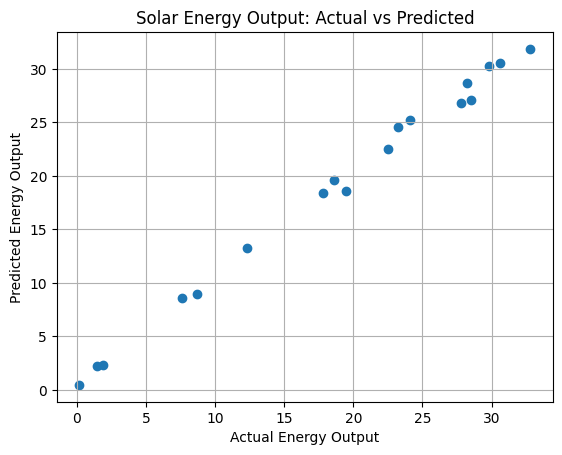

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Output")
plt.ylabel("Predicted Energy Output")
plt.title("Solar Energy Output: Actual vs Predicted")
plt.grid(True)
plt.show()

---

## **🧪 Why This Matters in the Real World**

- Solar energy output is highly weather-dependent
- Accurate prediction improves grid planning
- Helps optimize energy storage and distribution
- Supports renewable energy adoption

---

## **Key Takeaways**

1. Solar energy prediction is a practical regression ML problem.
2. Weather and environmental features drive energy output.
3. Random Forest captures non-linear patterns effectively.
4. MAE and R² are key evaluation metrics for regression tasks.
5. ML plays a crucial role in renewable energy optimization.

---